# Decision Trees

## What is a Decision Tree?

A Decision Tree is a flowchart-like tree structure where an internal node represents a feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition based on the attribute value. It partitions the tree in a recursive manner called recursive partitioning.

### Key Concepts:

- **Root Node**: Represents the entire dataset, which gets divided into two or more homogeneous sets.
- **Splitting**: Process of dividing a node into two or more sub-nodes.
- **Decision Node**: When a sub-node splits into further sub-nodes.
- **Leaf Node**: Terminal nodes that predict the outcome.
- **Pruning**: Removing sub-nodes of a decision node, can reduce overfitting.

## Applications of Decision Trees

Decision Trees have a wide range of applications, including:

- **Classification tasks**: Such as email spam detection, customer segmentation.
- **Regression tasks**: Like predicting house prices, stock prices.

## Advantages of Decision Trees

- **Easy to Understand**: They can be visualized, which makes them easy to interpret.
- **Requires Little Data Pre-processing**: No need to normalize features.
- **Can Handle Both Numerical and Categorical Data**: Can be used for various types of data.

## Disadvantages of Decision Trees

- **Overfitting**: They can create over-complex trees that do not generalize well.
- **Variance**: Small variations in data can result in different decision trees.

## In This Notebook

We will cover:

1. Basics of Decision Tree algorithm.
2. Building a Decision Tree model.
3. Evaluating the model's performance.


## Additional Resources

- [Decision Tree Learning (Wikipedia)](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [Scikit-learn Documentation: Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- [Understanding Decision Trees for Classification (Python)](https://www.datacamp.com/community/tutorials/decision-tree-classification-python) 


In [ ]:
# code adapted from 
# https://www.datacamp.com/tutorial/decision-tree-classification-python

In [6]:
# Set Directory
import os
# PLEASE CHANGE THIS TO YOUR ROOT DIRECTORY PATH
os.chdir('/Users/proud/Documents/GitHub/python-tutorials')
print(os.getcwd())

/Users/proud/Documents/GitHub/python-tutorials


In [7]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [8]:
df = pd.read_csv("data/ramen-ratings.csv")
df.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten',
       'Like'],
      dtype='object')

In [9]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Like
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,1


In [10]:
print("\nBrand Column Description:")
print(df.Brand.describe())
print("\nVariety Column Description:")
print(df.Variety.describe())
print("\nStyle Column Description:")
print(df.Style.describe())
print("\nCountry Column Description:")
print(df.Country.describe())
print("\nStars Column Description:")
print(df.Stars.describe())


Brand Column Description:
count       2580
unique       355
top       Nissin
freq         381
Name: Brand, dtype: object

Variety Column Description:
count     2580
unique    2413
top       Beef
freq         7
Name: Variety, dtype: object

Style Column Description:
count     2578
unique       7
top       Pack
freq      1531
Name: Style, dtype: object

Country Column Description:
count      2580
unique       38
top       Japan
freq        352
Name: Country, dtype: object

Stars Column Description:
count     2580
unique      43
top          4
freq       393
Name: Stars, dtype: object


Feature Selection - divide columns into dependent and independent variables

In [11]:
# Display rows with missing values
print(df[df.isnull().any(axis=1)])

# Drop rows with any missing values
df = df.dropna()

print("\nShape of the cleaned dataset:", df.shape)

      Review #           Brand  \
0         2580       New Touch   
1         2579        Just Way   
2         2578          Nissin   
3         2577         Wei Lih   
4         2576  Ching's Secret   
...        ...             ...   
2575         5           Vifon   
2576         4         Wai Wai   
2577         3         Wai Wai   
2578         2         Wai Wai   
2579         1        Westbrae   

                                                Variety Style   Country Stars  \
0                             T's Restaurant Tantanmen    Cup     Japan  3.75   
1     Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack    Taiwan     1   
2                         Cup Noodles Chicken Vegetable   Cup       USA  2.25   
3                         GGE Ramen Snack Tomato Flavor  Pack    Taiwan  2.75   
4                                       Singapore Curry  Pack     India  3.75   
...                                                 ...   ...       ...   ...   
2575  Hu Tiu Nam Vang ["

In [12]:
from sklearn.preprocessing import LabelEncoder

# Clean data
# Convert 'Stars' to numeric
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

# Drop 'Top Ten' column
df.drop(columns=['Top Ten'], inplace=True)

# One-Hot Encoding for 'Style'
df = pd.get_dummies(df, columns=['Style'])

# Label Encoding for 'Country'
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

df.head()

,Review #,Brand,Variety,Country,Stars,Like,Style_Bowl,Style_Cup,Style_Pack,Style_Tray
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,5,5.0,1,False,False,True,False
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,6,5.0,0,False,False,True,False
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,6,5.0,0,False,False,True,False
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,6,5.0,0,False,False,True,False
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,8,5.0,0,False,False,True,False


In [13]:
# Define features and target variable
feature_cols = ['Stars'] + [col for col in df.columns if 'Style_' in col] + ['Country']
X = df[feature_cols]  # Features
y = df['Brand']       # Target variable

In [14]:
X.head()

,Stars,Style_Bowl,Style_Cup,Style_Pack,Style_Tray,Country
616,5.0,False,False,True,False,5
633,5.0,False,False,True,False,6
655,5.0,False,False,True,False,6
673,5.0,False,False,True,False,6
752,5.0,False,False,True,False,8


In [15]:
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5384615384615384


Visualising Decision Trees

In [16]:
!pip install graphviz
!pip install pydotplus

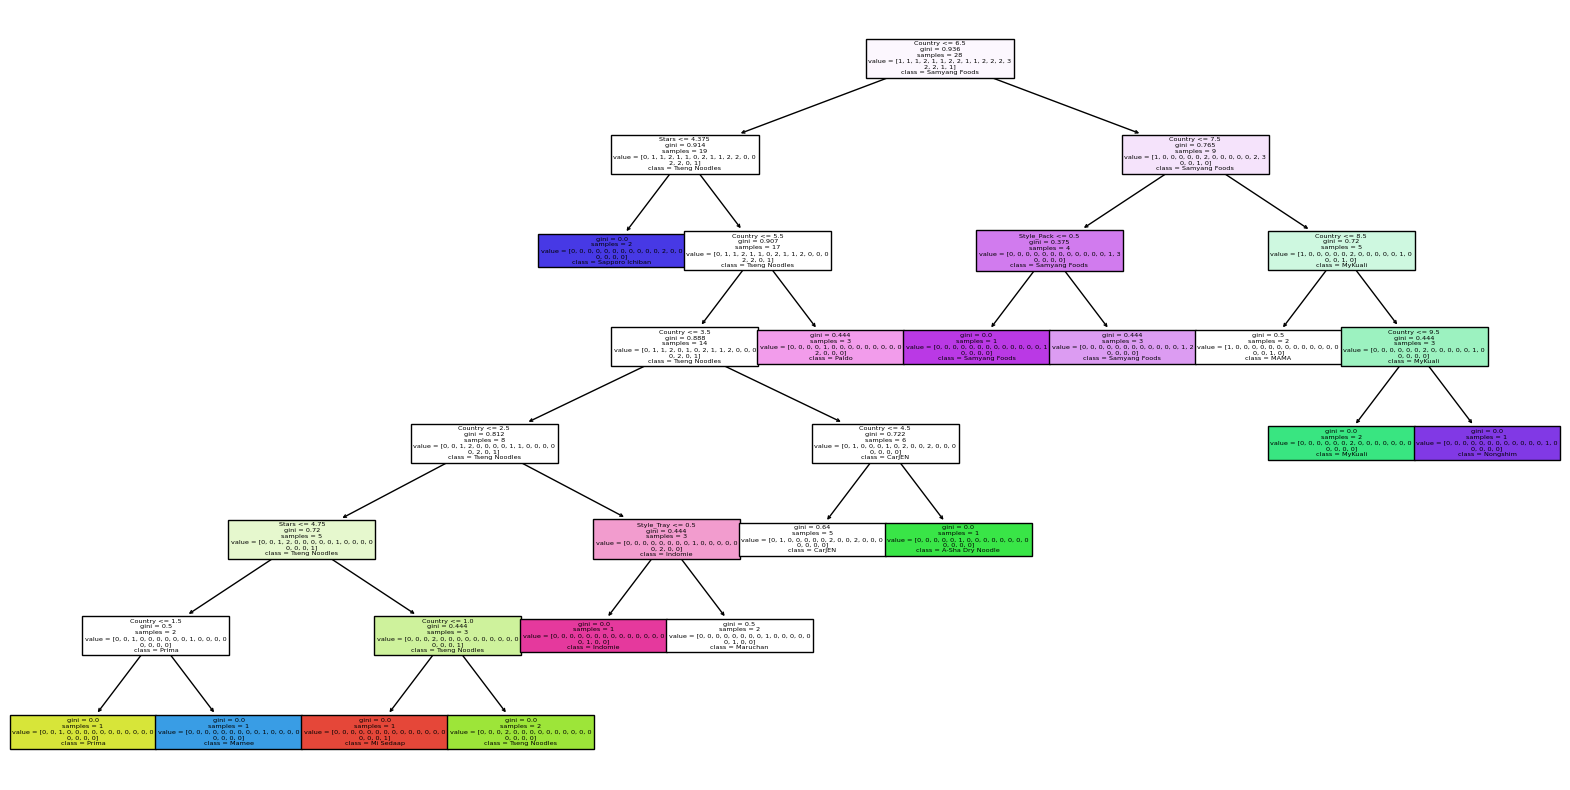

In [19]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=feature_cols, class_names=y.unique())
plt.show()
